# ** _pyOpTools_ ** __Tutorial__

*pyOpTools* is a set of *python* and *cython* packages that allow to create, manipulate and simulate optical systems.

Optical systems in *pyOptools* are build by serialization of optical components. Optical components at the same time are created by serialization of optical surfaces. Optical surfaces and rays are the basic classes in *pyOpTools*. *pyOpTools* includes several methods to access and manipulate data, a variety of predefined optical components and a catalogue of lenses and optical materials. 

The goal of this tutorial is to show how to create and display optical systems, how to perform basic simulations and how to access data. It is assumed that *pyOpTools* has been successfully installed. Often *pylab* and *NumPy* modules will be used.

In [1]:
# Import pyoptools to load all contents

from pyoptools.all import *

('Loading component library', 'Edmund', ' from files ', ['/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/pyoptools-0.1.1-py2.7-linux-x86_64.egg/pyoptools/raytrace/library/Edmund/SphOptics1.cmp', '/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/pyoptools-0.1.1-py2.7-linux-x86_64.egg/pyoptools/raytrace/library/Edmund/SphOptics.cmp'])


## Table of contents:

1. [3D Display](#1)

2. [Optical surfaces](#2)
    
    2.1 [Flat surfaces](#21)
    
    2.2 [Spherical surfaces](#22)
    
    2.3 [Cylinders and cilyndrical surfaces](#23)
    
    2.4 [Aspheric surfaces](#24)
    
    2.5 [Diffraction grating](#25)

3. [From optical surfaces to optical components](#3)

    3.1 [Predefined optical components](#31)
    
    3.2 [Lenses](#32)
    
    3.3 [Mirrors, stops & sensors](#33)
    
    3.4 [Optical prisms & beamsplitters](#34)
    
4. [Optical systems](#4)

    4.1 [Optical systems without rays](#41)
    
    4.2 [Rays](#42)
    
    4.3 [Ray tracing](#43)
    
    4.4 [Optical maps](#44)
    
    4.5 [Calculations on optical systems](#45)
    
    4.6 [Calculations involving rays](#46)

5. [More advanced examples](#5)

    5.1 [Diffraction grating](#51)

    5.2 [Autocollimator](#52)

    5.3. [Air spaced triplet telescope objective](#53)

    5.4 [Comparision between a spherical and an aspheric lens](#55)

    5.5 [Binocular design](#55)

    5.6 [Correcting aberrations using a diffraction grating](#56)

    5.7 [Creating a hologram](#57)


## 1. 3D Display <a class="anchor" id="1"></a>
To visualize any object created in *pyOpTools* and the raytracings, the class *Plot3D* is used as follows:

```python
    Plot3D(Obj,center=(x,y,z),size=(a,b),rot=[(rx,ry,rz)],scale=s)
```

where: 

 $\quad$  *Obj* is the name of the optical element or system to be plotted
   
 $\quad$  *(x, y, z)* are the cartesian coordinates of its center
>The y axis is pointing downwards and the z axis is pointing towards the screen.
   
 $\quad$  *(a, b)* are the horizontal and vertical dimensions of the image
   
 $\quad$  *(rx, ry, rz)* are the rotation angles around the x,y & z axes in radians.
>Rotations are made in the following order: first around the *x* axis, then around the *y* axis and finally around the *z* axis.

>It is possible to add additional rotations so as to choose the order in which rotations are made

> ```python
    rot=[(rx1,ry1,rz1),(rx2,ry2,rz2),(rx3,rx3,rx4),...]
```
> where *(rxi, ryi, rzi)* are the rotation angles of the i-th rotation.

$\quad$ *s* is the scale of the image in the notebook.

> **Note:  All distances are measured in $mm$ except the wavelengths which are measured in $\mu m$**


<img style="float: left;width: 250px;" src="Repere.png">


## 2. Optical surfaces <a class="anchor" id="2"></a>

The fundamental objects in *pyOpTools* are the optical surfaces. Optical components and optical systems are just arrangements of optical surfaces. An optical surface is charcterised by its shape, its curvature and its reflectivity and as any other object it has a position and an orientation.

### 2.1 Flat surfaces <a class="anchor" id="2.1"></a>

Flat surfaces can be created as follows:

```python 
    P=Plane(shape=Shape(parameters=(,)),reflectivity=r)
```
__*Shape* can be either *Circular*, *Rectangular* or *Triangular* and the parameters can be the radius, the rectangular dimensions or the cartesian coordinates of the edges respectively.__

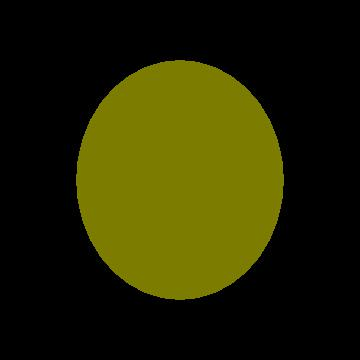

In [48]:
#Example 2.1 : Plane surfaces

P1=Plane(shape=Circular(radius=(20)),reflectivity=1)
P2=Plane(shape=Rectangular(size=(40,25)))
P3=Plane(shape=Triangular(coord=((-15,15),(5,-20),(18,12))))

Plot3D(P1,center=(0,0,0),size=(60,60),rot=[(0,-pi/6,0)],scale=6)

### 2.2 Spherical surfaces <a class="anchor" id="2.2"></a>

Spherical surfaces can be created as follows:

```python
        S=Spherical(curvature=c, shape=Shape(parameters=(,)),reflectivity=r)
```
*Shape* can be either *Circular* or *Rectangular*. The curvature c$=\frac{1}{R}$, where R is the radius of the sphere that generates the spherical surface.


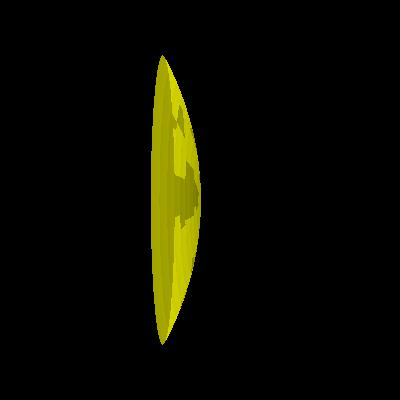

In [49]:
# Example 2.2: Spherical surface

S=Spherical(curvature=1/300., shape=Circular(radius=145.),reflectivity=1)

Plot3D(S,center=(0,0,0),size=(400,400),rot=[(0,-pi/1.9,0)],scale=1)

### 2.3 Cylinders and cylidrical surfaces <a class="anchor" id="2.3"></a>

Circular cylinders as well as portions of, them with different shapes and curvatures can be created in *pyOpTools* 

```python
     S=Cylindrical(shape=Shape(parameters=(,)),curvature=c,reflectivity=r)
```
*Shape* can be *Circular*  or *Rectangular* 

the entire cylinder is created as follows:

```python
    S=Cylinder(radius=r,length=l,reflectivity=r)
```



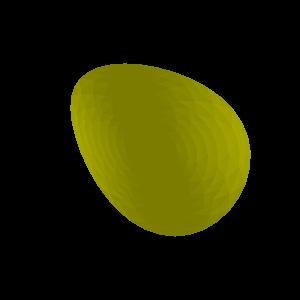

In [50]:
# Example 2.3: Circular cilynders with different shapes

S1=Cylinder(radius=36,length=100,reflectivity=1)
S2=Cylindrical(shape=Circular(radius=(50)),curvature=1/100.)
S3=Cylindrical(shape=Rectangular(size=(50,100)),curvature=1/20.)

Plot3D(S2,center=(0,0,0),size=(150,150),rot=[(pi/6,pi/6,0)],scale=2)

### 2.4 Aspheric surfaces <a class="anchor" id="2.4"></a>

*pyOpTools* allows creating aspherical surfaces. 

An aspheric surface can be written as:

$$Z=\frac{(A_x x^2+A_y y^2)}{(1+\sqrt{(1-(1+K_x)A_x^2 x^2-(1+K_y) A_y^2 y^2))}}+ poly2d()$$

The surface is defined by entering the coefficients $A_x, A_y$ and $K_x, K_y$ and the coefficients of the polynomial __*poly2d()*__ -a two dimensional polynomial whose arguments are x,y.

```python
    sa=Aspherical(shape=Shape(parameters=(,)),Ax=A,Ay=B,Kx=C,Ky=D, poly=poly2d((a,b,c,d,e,f)))
```

>*Shape* can be either *Circular* or *Rectangular*.


In [7]:
# Example 2.4  poly2d in pyOpyools

p2d=poly2d((1,2,3,4,5,1,7,8,9,10,11,12))
print(p2d)


1.0+2.0x+3.0y+4.0x^2+5.0xy+y^2+7.0x^3+8.0x^2y+9.0xy^2+10.0y^3+11.0x^4+12.0x^3y


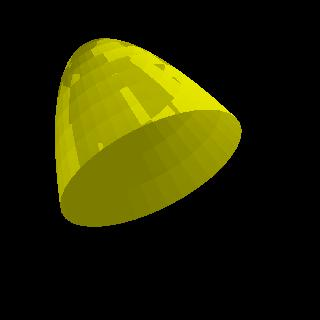

In [52]:
# Example 2.5 Symmetric aspherical surface

AS=Aspherical(shape=Circular(radius=2.5),Ax=.2,Ay=.2,Kx=.1, Ky=.15, poly=poly2d((0,0,0,.5,0,.5)))
Plot3D(AS,center=(-2,-2,5),size=(8,8),rot=[(-3*pi/10,pi/4,0)],scale=40)

### 2.5 Diffraction grating <a class="anchor" id="2.5"></a>

Difraction gratings in *pyOpTools* are defined as a special kind of surface.

```python
    g=RPPMask(shape=Shape(parameters=(,)), phm= poly2d([a,b,c,...]),M=[p])
```
*Shape* can be either *Circular*, *Rectangular* or *Triangular*. The parameter p is the diffraction order to be taken into account. *phm* is a polynomial whose coefficients define the grating pattern as if the the grating were contour map of the three dimensional surface generated by the polynomial.

In the case of a linear grating, *phm* can be defined using just the three first coefficients of *poly2d*; only the linear coefficients are needed for the grating definition. *b* and *c* are the linear coefficients of the unit cell in the x & y directions. The value of *a* is not of importance.

The coefficients b and c are related to the distances $d_x$ and $d_y$  between adjacent sources on the *x* and *y* axis of the grating respectively:

poly2d([a,b,c])
$$b=\frac{2\pi}{d_x}\quad c=\frac{2\pi}{d_y}$$
> A diffraction grating example will be presented in section 5.

# 3. From Optical surfaces to Optical components <a class="anchor" id="3"></a>

By properly linking some optical surfaces it is possible to build several optical components using the *pyOpTools* class *Component* as follows:
```python
    P=Component(surflist=[(S1,(x1,y1,z1),(rx1,ry1,rz1)),
                          (S2,(x2,y2,z2),(rx2,ry2,rz2)),
                          (S3,(x3,y3,z3),(rx3,ry3,rz3))],material=n)            
```
    
where 

$
    \quad S_i$ is the name of the i-th optical surface
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the x,y & z axes.


   $\quad$ n  is the refraction index of the optical component.
   
*pyOpTools* has a class called *material* which is meant to organize a wide catalogue of refractive index from several lens fabricants, among them:
- sumita
- ohara
- hoya
- corning
- schott

To access the value of the refractive index: 

```python
    n=material.fabricant['ManofacturerTM']
```

To display all the Manofacturer's TradeMarks of the lenses availables 

```python
    material.fabricant.keys()
```

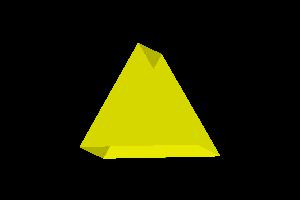

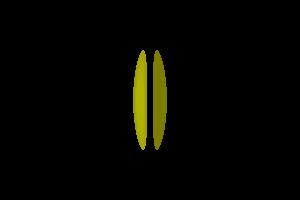

In [54]:
# Example 3.1: Building an equilateral prism and a cylindrical lens
from math import *

## Prism 

L=60
h=L/2.*cos(pi/3.)
h1=L/2*sin(pi/3)
S1=Plane(shape=Rectangular((L,L)))
S2=Plane(shape=Rectangular((L,L)))
S3=Plane(shape=Rectangular((L,L)))

T1=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
T2=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))

P=Component(surflist=[(S1,(0,h1,0),(pi/2,0,0)),
                      (S2,(0,0,h),(pi/6,0,0)),
                      (S3,(0,0,-h),(-pi/6,0,0)), 
                      (T1,(L/2,0,0),(0,pi/2,0)),
                      (T2,(-L/2,0,0),(0,pi/2,0))
                      ], 
                      material=material.schott["BK7"])

## Cylindrical lens

S4=Cylindrical(shape=Circular(radius=25),curvature=1./200)
S5=Cylindrical(shape=Circular(radius=25),curvature=-1./200)

L=Component(surflist=[(S5,(0,0,5),(0,0,pi/2)),
                      (S4,(0,0,-5),(0,0,pi/2))
                      ], 
                      material=material.schott["BK7"])

display(Plot3D(P,center=(0,0,0),size=(150,100),scale=2,rot=[(0,pi/2+.2,0),(-.1,0,0)]))
Plot3D(L,center=(0,0,0),size=(150,100),scale=2,rot=[(0,pi/2.2,0),(0,0,0)])

## 3.1 Predefined optical components <a class="anchor" id="31"></a>

Defining optical components surface by surface can be cumbersome. Therefore *pyOptools* includes several predefined components optical components including: different kinds of lenses, mirrors, stops, CCD, glass blocks, optical prismes and beamsplitters.

## 3.2 Lenses <a class="anchor" id="32"></a>

Between the predefined lenses there are ideal lenses, ideal thick lenses, spherical lenses, doublets, airspaced doublets and a catalogue of lenses.

To create an ideal lense of focal lenght *l* and an ideal thick lense of focal lenght *l* and thickness *t*

```python
    L2=IdealLens(shape=Shape(parameter=(,)),f=l)
    
    L=IdealTLens(shape=Shape(parameter=(,)), f=l, d=t)
```

To create a spherical lens

```python
    L1=SphericalLens(radius=r,curvature_s1=c1,curvature_s2=c2,thickness=t,material=n)
```
where *c1* and *c2* are the curvature radii of the surfaces and *n* is the refraction index. The sign convention for the radius of curvature is: positive if the center of curvature is to the right of the surface, and negative if it is to the left.

To create a doublet and an air spaced doublet 

    L=Doublet(radius =r,curvature_s1 = c1, curvature_s2 = c2,
                        curvature_s3 = c3, thickness_l1 = t1, thickness_l2 = t2,
                        material_l1 = n1, material_l2 = n2)
    
    L=AirSpacedDoublet(radius = r, curvature_s1= c1,curvature_s2= c2,
                        curvature_s3 = c3, curvature_s4= c4, thickness_l1= t1,air_gap= ta, thickness_l2 = t2,
                        material_l1 =n1, material_l2 = n2)

> Puede haber problemas con la visualizacion  IdealTLenses



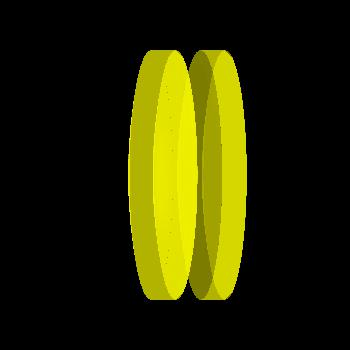

In [55]:
# Example 3.2 Visualization of an air spaced doublet

L=AirSpacedDoublet(radius = 25.,curvature_s1= 0.01,curvature_s2= 0.01,
                        curvature_s3= 0.01,curvature_s4= 0.01, thickness_l1= 5,air_gap=5 , thickness_l2= 5,
                        material_l1=1., material_l2=1.)

Plot3D(L,center=(0,0,0),size=(70,70),rot=[(0,pi/1.8,0)],scale=5)

### Catalog of lenses

The class *library* from *pyOpTools* has the possibility to add catalogues of lenses. The catalogue from *Copyright 2018, Edmund Optics Inc* is included. Other catalogues can be added and compatibility with Zemax libraries is under development.

To create a lens from the *Edmund Optics* catalogue:

```python
    L=library.Edmund.get("LENS_CODE")
```

The lenses codes and their characteristics can be consulted in /pyoptools/raytrace/library/Edmund/SphOptics.cmp

## 3.3 Mirrors, stops & sensors <a class="anchor" id="33"></a>

Predefined round and rectancular thick plane mirrors can be created as follows:

```python
    m=RoundMirror(radius= r, thickness = l, reflectivity = R)
    m2=RectMirror(size= (a,b,c), reflectivity = R)
```
Thin mirrors can be created as optical surfaces by adjusting the shape, size and reflectivity.

To create different shapes stops and rectangular CCDs
    
```python    
    AP=Stop(shape=Shape(parameters=(,)), ap_shape=Shape(parameters=(,)))
    c=CCD(size=(a,b))
```
> *Shape* can be be either *Circular*, *Rectangular* or *Triangular*. 

    

In appeareance, stops and CCDs look exactly like optical surfaces but when interacting with rays they show different propperties.
    

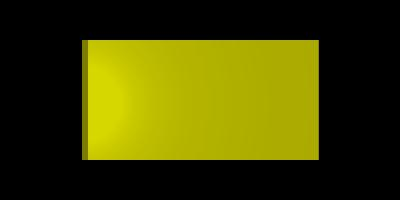

In [56]:
# Example 3.3 Visulization of a rectangular thick mirror.

m2=RectMirror(size= (5,30,60), reflectivity = 1)

Plot3D(m2,center=(0,0,30),size=(100,50),rot=[(0,pi/1.7,0)],scale=4)


## 3.4 Optical prisms & beamsplitters <a class="anchor" id="34"></a>

A glass block of refractive index *n*  and a beamsplitter whose hipotenuse reflectivity is *R*  are created as follows:

```python
    B=Block(size=(a,b,c), material=n)
    BS=BeamSplitingCube(size= l, reflectivity=R, material= n)
```

To create a right angle prism of dimensions *w* and *h* and hipotenuse of reflectivity of *R*  and a penta-prism of side *l* and refractive index *n*:

```python
    RP=RightAnglePrism(width=w,height=h,material=n,reflectivity=R)
    PP=PentaPrism(l, material= n)
```

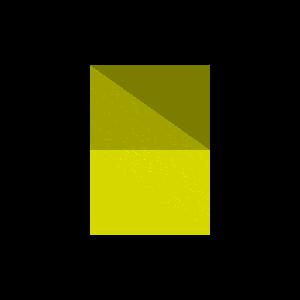

In [57]:
# Example 3.4 Visulization of a beamsplitter

BS=BeamSplitingCube(size=20, reflectivity=0.5, material=material.schott["BK8"])


Plot3D(BS,center=(0,0,0),size=(50,50),rot=[(pi/4,0,0)],scale=6)

# 4. Optical systems <a class="anchor" id="4"></a>

In order to make ray tracing, *pyOpTools* uses the class *System*. A System is constitued by a set of optical components properly arranged and a light rays.

By adding a CCD anywhere in the optical path it is possible to visualize the profile of the beam as it would be captured by an optical sensor.

## 4.1 Optical systems without rays <a class="anchor" id="41"></a>

First, we consider only an optical system without rays. Rays will be added later.

```python
    S=System(complist=[(C1,(x1,y1,z1),(rx1,ry1,rz1)),(C2,(x2,y2,z2),(rx2,ry2,rz2)),(C3,(x3,y3,z3),(rx3,ry3,rz3))],n=1)
```    
where

$
    \quad C_i$ is the name of the i-th optical component
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the x,y & z axes


   $\quad$ *n*  is the refraction index of the medium in which the optical system is immersed
   

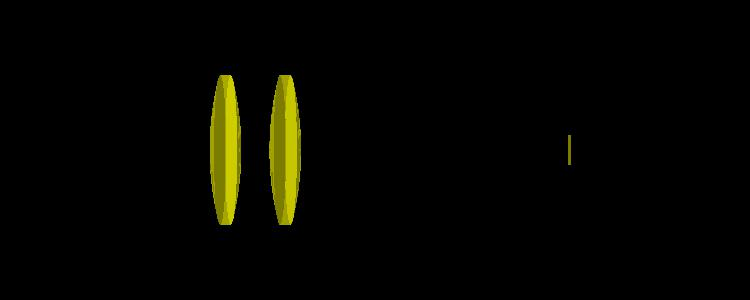

In [60]:
#Example 4.1: Visualization of 2 predefined lenses and a CCD

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

Plot3D(S,center=(0,0,150),size=(250,100),scale=3,rot=[(0,pi/1.9,0)])

## 4.2 Rays <a class="anchor" id="42"></a>

In *pyOpTools* a ray is an object characterised by its origin coordinates (x,y,z), its direction in cartesian coordinates (ux,uy,uz), its intensity, and its wavelength in $\mu$m.

```python
    R=Ray(pos=(x,y,z),dir=(ux,uy,uz),intensity=I,wavelength=lambda)
```
several rays can be generated under the same name as a list of rays.


It is also possible to create a beam of parallel rays or a beam of rays emitted from a point source.

```python
    PB=parallel_beam_c(origin=(x,y,z),direction=(rx,ry,rz),size=(a,b),num_rays=(na,nb),wavelength=lambda,label="")

    RS=point_source_c(origin=(x,y,z),direction=(rx,ry,rz),span=(alpha,beta),num_rays=(na,nb),wavelength=labmda,label="")
```                     
where 
    
    (x,y,z) are the coordinates of the origin of the central ray of the beam 
    
    (rx,ry,rz) are the rotation angles in radians around the x,y & z axes made to a ray propagating in
         the z direction.
    
    (a,b) is the size of the beam in perpendicular directions to the propagation axis
    
    (na,nb) number of rays in perpendicular directions to the propagation axis
    
    (alpha,beta) are the angular dimensions of the beam in perpendicular directions to the propagation axis
> by default the beam points towards the positive z axis, it has an intensity of intensity=1, wavelength=0.58929; num_rays=(10,10), and an angular size of $\frac{\pi}{8}$ or linear size of 1 depending on the case.



In order to add rays as a part of the optical system we use the method *ray_add*:

```python
    S.ray_add(R)
```
The method *propagate* allows to calculate the optical path followed by the rays that can be later visulized using Plot3D. 

```python
    S.propagate()
```    

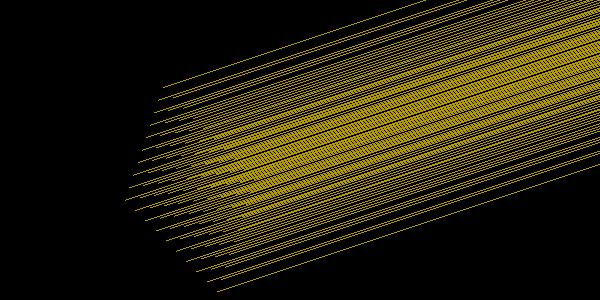

In [61]:
#Example 4.2  Visualization of a default parallel beam

S=System()
R=parallel_beam_c()

S.ray_add(R)
S.propagate()

Plot3D(S,center=(0.3,-0.4,0.6),size=(4,2),scale=150,rot=[(pi/4,pi/6,pi/4)])

## 4.3 Ray tracing <a class="anchor" id="43"></a>

To perform the ray tracing through an optical system containing optical components, rays must be added to the optical system and then propagated.

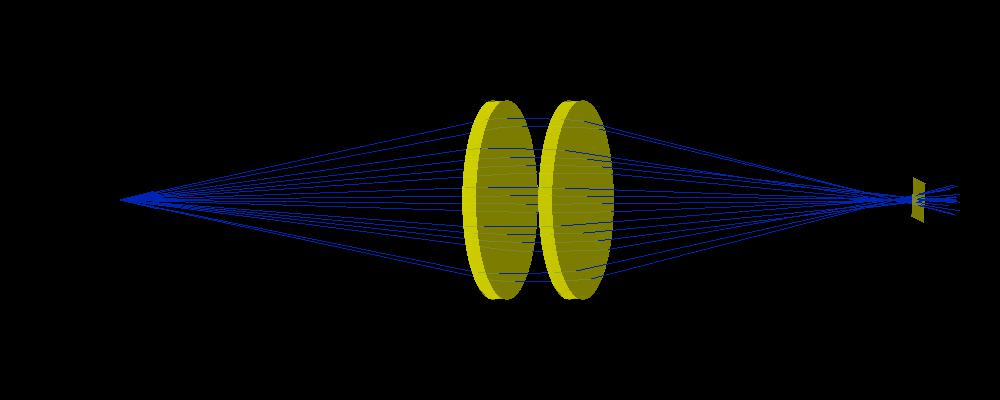

In [64]:
# Example 4.3 : Ray tracing for the optical system of the example 4.1

L1=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

CSys=CCD()

S=System(complist=[(L1,(0,0,100),(0,0,0)),(L2,(0,0,120),(0,0,0)),(CSys,(0,0,210),(0,0,0)) ],n=1)

R=point_source_c(origin=(0,0,0),direction=(0,0,0),span=(pi/8,pi/8),num_rays=(5,4),wavelength=0.45,label="")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

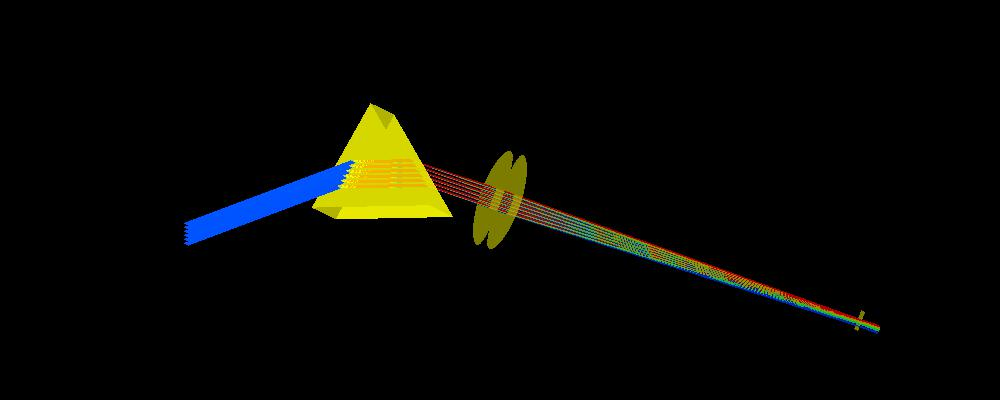

In [62]:
## Example 4.4 : Spectroscope using the components from the example 3.1

## Taken from the example 3.1
# Prism
from math import *

L=60
h=L/2.*cos(pi/3.)
h1=L/2*sin(pi/3)
S1=Plane(shape=Rectangular((L,L)))
S2=Plane(shape=Rectangular((L,L)))
S3=Plane(shape=Rectangular((L,L)))

T1=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
T2=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
P=Component(surflist=[(S1,(0,h1,0),(pi/2,0,0)),
                      (S2,(0,0,h),(pi/6,0,0)),
                      (S3,(0,0,-h),(-pi/6,0,0)), 
                      (T1,(L/2,0,0),(0,pi/2,0)),
                      (T2,(-L/2,0,0),(0,pi/2,0))
                      ], 
                      material=material.schott["BK7"])

S4=Cylindrical(shape=Circular(radius=25),curvature=1./200)
S5=Cylindrical(shape=Circular(radius=25),curvature=-1./200)

# Lens
L=Component(surflist=[(S5,(0,0,5),(0,0,pi/2)),
                      (S4,(0,0,-5),(0,0,pi/2))
                      ], 
                      material=material.schott["BK7"])

# CCD and optical system
CSpect=CCD()
PCCD=243.5

S=System(complist=[(P,(0,0,0),(0,0,0)),
                   (L,(0,.35*60,60),(-0.357,0,0)),
                   (CSpect,(0,.35*PCCD,PCCD),(-0.357,0,0))],n=1)


## Polychromatic beam
R=[]

for x in range (-5,6,1):
    for y in range (-5,6,2):
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.45))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.5))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.55))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.60))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.65))
S.ray_add(R)
S.propagate()

Plot3D(S,center=(0,.35*60,60),size=(500,200),scale=2,rot=[(0,pi/2+.2,0),(-.1,0,0)])


### 4.4 Optical maps <a class="anchor" id="44"></a>

As it was mentionned, by putting a CCD across the light beam the optical path length traversed by the rays hitting the detector as well as the hit points on the CCD can be obtained.

Let C be a CCD:

To visualize the hit points on the CCD as a spot diagram

```python
    spot_diagram(C)

    spot_diagram_c(C) #Colored
```
To create a map ofthe optical path length of the the beam hitting the detector.

```python
    C.get_optical_path_map(size=(a,b))
``` 
>This method uses the optical path length of the rays hitting the surface to 
        create a optical path length map of size (a,b) in the surface of the CCD. The returned value is an interpolation of the
        values obtained by the rays. The method needs at least 20 rays to perform the interpolation.
        
To get a p-order polynomial approximation of the optical path length map, and the associated error

```python
    poly,error=C.get_optical_path_map_lsq(order=p)
```
       

To get both the hit points in the CCD and the optical path length.

```python
    C.get_optical_path_data()
```
>Data is displayed as a tuple X,Y,D, where X & Y contain the hit points, and 
        D containing the optical path.

([0.45658027594259032,
  -0.45658027594258765,
  1.8124557397722256,
  -0.20643383967222118,
  0.20643383967222206,
  -1.8124557397722256,
  1.058982857694712,
  -0.39588193357762425,
  0.39588193357762336,
  -1.058982857694712,
  1.8124557397722256,
  -0.20643383967222118,
  0.20643383967222206,
  -1.8124557397722256,
  0.45658027594259032,
  -0.45658027594258765],
 [-1.3886103716386202,
  -1.3886103716386202,
  -0.91501878457177632,
  0.31087134222859625,
  0.31087134222859625,
  -0.91501878457177632,
  0.0,
  0.0,
  0.0,
  0.0,
  0.91501878457177632,
  -0.31087134222859625,
  -0.31087134222859625,
  0.91501878457177632,
  1.3886103716386202,
  1.3886103716386202],
 [220.85950385653626,
  220.85950385653626,
  221.00077938937272,
  220.49883328696868,
  220.49883328696868,
  221.00077938937272,
  220.7661279552741,
  220.4943566553792,
  220.4943566553792,
  220.7661279552741,
  221.00077938937272,
  220.49883328696868,
  220.49883328696868,
  221.00077938937272,
  220.85950385653626

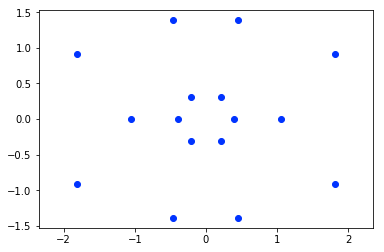

In [65]:
# Example 4.5:  Recovering the information from the CCD of the example 4.3

spot_diagram_c(CSys)
CSys.get_optical_path_data()


220.512974892+4.57178796509e-15x+-9.93739320886e-15y+0.113587935017x^2+-2.24806175687e-15xy+0.161841006857y^2
Populating the interactive namespace from numpy and matplotlib


/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'poly', 'cosh', 'ldexp', 'hypot', 'tan', 'isnan', 'log', 'fabs', 'floor', 'cross', 'sqrt', 'frexp', 'degrees', 'pi', 'log10', 'sin', 'fmod', 'exp', 'unwrap', 'void', 'copysign', 'expm1', 'ceil', 'isinf', 'sinh', 'trunc', 'cos', 'e', 'tanh', 'radians', 'modf', 'log1p', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


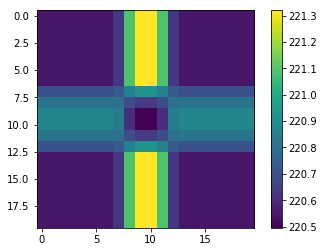

In [10]:
# Example 4.6: Polynomial aproximation and visualization of the optical path length map of the example 4.3 using pylab.

poly,error=CSys.get_optical_path_map_lsq(order=2)
print(poly)

%pylab inline
imshow(CSys.get_optical_path_map())
colorbar()


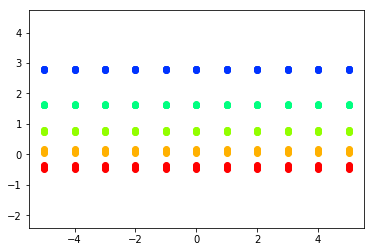

In [11]:
# Example 4.7: spot diagram for the CCD of the example 4.4

spot_diagram_c(CSpect)

##  4.5 Calculations on optical systems <a class="anchor" id="45"></a>

*pyOptools* module *calc* includes useful methods to perform calculations involving rays and compute the parameters of the optical systems. 

Given a pair of rays it is possible to find the intersection point or, if they do not intersect, the nearest points.
To compute the coordinates of intersection or the coordinates of nearest points and the distance between them:

```python
    intersection(Ray1,Ray2)
    nearest_points(Ray1, Ray2)
```
To compute the parameters of the optical systems it is neccessary to define an optical axis, represented as a single not propagated ray. For these calculations to work systems must have rotational symmetry.

Let *S* be an optical system and *OA* its optical axis.
 
To find the primary principal plane
```python
    find_ppp(S, OA)
```
Given the aperture stop *AP* or a ccd *C* located in the aperture plane, to find the pupil location
```python
    pupil_location(S,AP,OA)
```
and to get the parameters of a chief ray from an object point of coordinates *(x,y,z)*
```python
    chief_ray_search(S,AP,(x,y,z),(rx,ry,rz))
```
> The (rx,ry,rz) angles, containing the rotations made to a ray propagating in the z direction, define a test direction used as seed for the algorithm.

To calculate the image position of an object located in the optical axis
```python
    paraxial_location(S, OA):
```
> The object position is specified by the coordinates of the optical axis origin.

> A boolean indicates if the image is real *True* or virtual *False*.



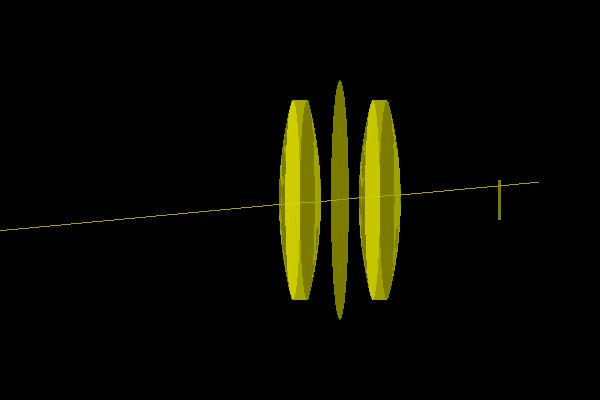

In [68]:
# Example 4.8: Chief ray for the system from the example 4.3 with an aperture stop between the two lenses

L1=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

AP=Stop(shape=Circular(radius=(30)), ap_shape=Circular(radius=(25)))

S=System(complist=[(L1,(0,0,100),(0,0,0)),(L2,(0,0,120),(0,0,0)),(AP,(0,0,110),(0,0,0)), (C,(0,0,150),(0,0,0))  ],n=1)

CHR=chief_ray_search(S,AP,(0,10,0),(0,-1,1))

S.ray_add(CHR)
S.propagate()
Plot3D(S,center=(0,0,100),size=(150,100),scale=4,rot=[(0,pi/2.1,0)])


### 4.6 Calculations inolving rays <a class="anchor" id="46"></a>

The class *ray* has several useful methods when dealing with rays.

To change the coordinate system of a ray to a system whose coordinates in the old coordinates system are *(x, y, z)* and whose rotation angles in the old coordinates system are (rx, ry, rz).
> In this case, rotations are made in the following order: first around the *z* axis, then around the *y* axis and finally around the *x* axis.

> Rotation is applied before traslation

```python
    ch_coord_sys_inv((x,y,z),(rx,ry,rz))
```
To make a copy of a ray
```python
    copy()
```
To make a copy of a ray with the opposite direction
```python
    reverse()
```
When a ray interacts with an optical surface, the original ray, called *parent* ray, ends and a new ray is created. This process is repeated every time the ray hits an optical surface. Those new rays are called *child* rays and they follow the optical path of the *parent* ray. *Child* rays and are defined as a property of the original ray.  

To get the final *child * ray of the propagation
```python
    get_final_rays()
```

To add a *child* ray
```python
    add_child(ChildRay)
```

To get the optical path length traversed by a ray from its origin to its end (intersection with a surface)
```python
    optical_path(self)
```
Finally, to get the optical path length of a *parent* ray whose *child* ray is *CR*, from the origin of the *parent* ray to the origin of the *child* ray

```python
    CR.optical_path_parent()
```


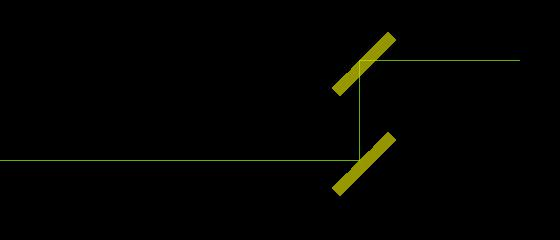

155.0

In [43]:
# Example 4.9: Optical path of a ray

M=RectMirror(size= (20,30,3), reflectivity = 1)
C=CCD()

S=System(complist=[(M,(0,0,100),(0,pi/4,pi/2)), (M,(0,-25,100),(0,pi/4,pi/2)), (C,(0,-25,130),(0,0,0))],n=1)

R=Ray(pos=(0,0,0),dir=(0,0,1),wavelength=.55) #Parent ray

S.ray_add(R)
S.propagate()

display(Plot3D(S,center=(0,-10,80),size=(140,60),scale=4,rot=[(0,pi/2,0)]))

#R.optical_path()   # Optical path from the origin to the first mirror
(R.get_final_rays()[0]).optical_path_parent() # Optical path from the origin to the second mirror


## 5. More advanced examples <a class="anchor" id="5"></a>

In this section there are more elaborated examples involving problems in optics in order to show all the potential of *pyOpTools*. 

1. Diffraction grating

2. Autocollimator

3. Air spaced triplet telescope objective

4. Comparision between a spherical and an aspheric lens

5. Binocular

6. Correcting aberrations using a diffraction grating

7. Creating a hologram


### 5.1 Diffraction grating <a class="anchor" id="51"></a>

In section 2.5 diffraction grattings were introduced. Now we create, visualize and collect data from a polycromatic light beam that interacts with a diffraction grating.

Populating the interactive namespace from numpy and matplotlib


/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'unwrap', 'void', 'cross']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


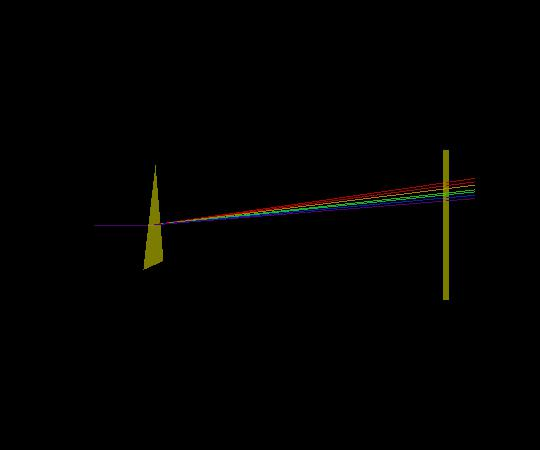

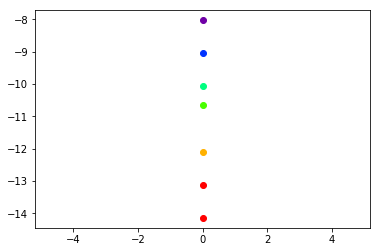

In [2]:
d=0.005 #Distancee between adjacent sources on the grating in mm
    
G=RPPMask(shape=Triangular(coord=((-15,15),(5,-20),(18,12))), phm=poly2d([0,0,2*pi*1/d,0,]),M=[-1])#,0,-1,-2])

OC=Component(surflist=[(G, (0, 0, 0), (0, 0, 0))])

C=CCD(size=(10,50))

S=System(complist=[(OC,(0,0,20),(0,0,0)),(C,(0,0,120),(0,0,0))],n=1)

r=[]
#Test using many wavelengths
for w in (.4,.45,.5,.53,.6,.65,.7):
    
    r.append(Ray(wavelength=w)) #standard rays of different wavelength


S.ray_add(r)
S.propagate()

%pylab inline
display(Plot3D(S,center=(0,0,60), size=(180,150),scale=3,rot=[(0,pi/2.3,0)]))
spot_diagram_c(C)

### 5.2 Autocollimator <a class="anchor" id="52"></a>

Autocollimators are used to measure small angles over long distances. In this example we intend to measure the relative angle between two mirrors using an autocollimation system.



Populating the interactive namespace from numpy and matplotlib


/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'unwrap', 'void', 'cross', 'SA']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


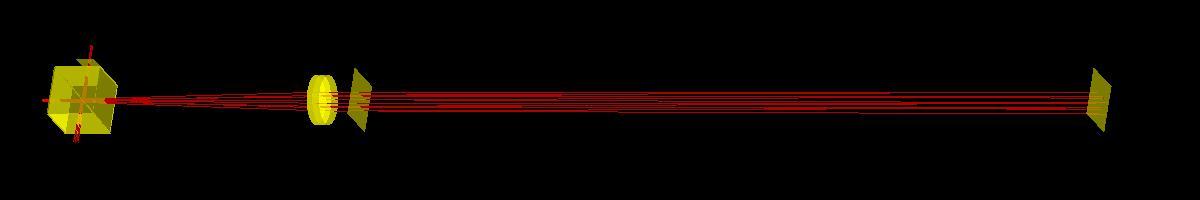

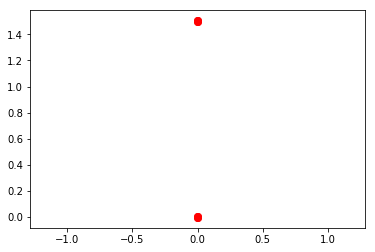

In [2]:
# Autocollimator with a plane mirror

SA=0.005 # small angle in radians -less than 0.01rad

BS=BeamSplitingCube(size=25,reflectivity=.5,material=1.) 
L=library.Edmund.get("32494")
M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
M2=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

C=CCD()

#There is a measure problem, if the angle is too small the cavity gets resonant
S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,150),(0,-pi,0)),(M1,(0,0,170),(0,0,0)),(M2,(0,0,570),(SA,0,0))],n=1.)
R=point_source_c(span=(0.04,0.04), num_rays=(2,2), wavelength=.65)

S.ray_add(R)
S.propagate()

% pylab inline
display(Plot3D(S,center=(0,0,300), size=(600,100),scale=2,rot=[(0,0,-3*pi/8),(0,3*pi/8,0)]))
spot_diagram_c(C)


In [3]:
# Calculating the small angle SA from data

d=C.get_optical_path_data()[1][0]-C.get_optical_path_data()[1][1]

print 'The measured angle is SA=', (d/(150*2))



The measured angle is SA= 0.00500545709779


### 5.3 Air spaced triplet telescope objective <a class="anchor" id="53"></a>

This example has been taken from the book *Warren J. Smith, Modern optical engeneering. Fourth edition; chapter 19, p534*. In this chapter several lens designs are studied.

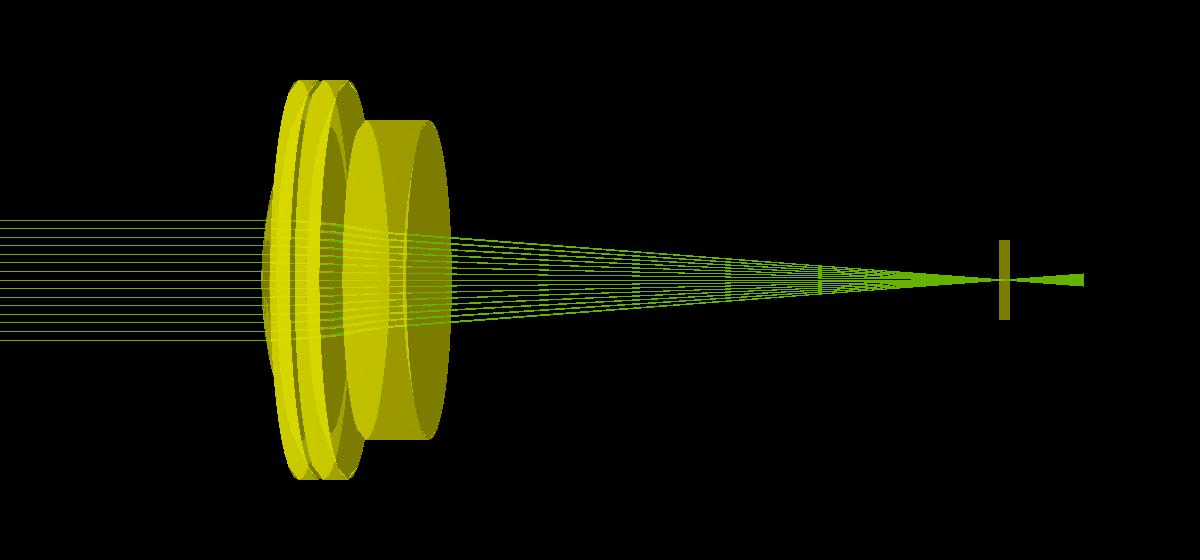

100.058939985


In [3]:
## Air spaced triplet telescope objective - 

L1=SphericalLens(radius=25,curvature_s1=1/50.098,curvature_s2=-1/983.420,thickness=4.500,material=material.schott["BK7"])
L2=SphericalLens(radius=25,curvature_s1=1/56.671,curvature_s2=-1/171.150,thickness=4.500,material=material.schott["BK7"])
L3=SphericalLens(radius=20,curvature_s1=-1/97.339,curvature_s2=1/81.454,thickness=3.500,material=material.schott["SF1"])

OA=Ray(pos=(0,0,-10000),dir=(0,0,1),wavelength=.55) # Optical axis

C=CCD(size=(10,10))

S=System(complist=[(L1,(0,0,100),(0,0,0)),(L2,(0,0,104.6),(0,0,0)),(L3,(0,0,114.171),(0,0,0)), 
                   (C,(0,0,191.053),(0,0,0))],n=1)


PB=parallel_beam_c(origin=(0,0,50),direction=(0,0,0),size=(15,15),num_rays=(15,15),wavelength=0.55)

S.ray_add(PB)
S.ray_add(PB[7])
S.ray_add(PB[8])
S.propagate()
display(Plot3D(S,center=(0,0,140),size=(150,70),scale=8,rot=[(0,pi/2.2,0)]))


# To check if the simulation is correct we calculate the focal distance as the distance between 
# the primary principal plane and the paraxial focal point. (According to the book the focal length is 100mm)

f=(nearest_points(PB[110].get_final_rays()[0],PB[115].get_final_rays()[0])[0][2])-(find_ppp(S, OA)[2])
print f


### 5.4 Comparision between a spherical and an aspheric lens <a class="anchor" id="54"></a>

In this example we compare a spherical to an aspherical lens of the same focal length (100mm). 

First we localize the plane of the circle of least confusion by minimizing the standard deviation of the x coordinate of the hit points using the *scypy* method *fmin*. Then we compare the spot diagrams and the standard deviations in the plane of the circle of least confusion.

In [39]:
# Finding the plane of the circle of least confusion

def CircleSph(lp):
    L=library.Edmund.get("45113")
    CSph=CCD(size=(3,3))

    SSph=System(complist=[(L1,(0,0,20),(0,0,0)),(CSph,(0,0,lp),(0,0,0))],n=1)
    PB= parallel_beam_c(size=(2,2),num_rays=(5,5), wavelength=.650)

    SSph.ray_add(PB)
    SSph.propagate()
    X,Y,Z=CSph.get_optical_path_data()
    return array(X).std()

In [30]:
# Seed
CircleSph(25)

0.016890069959404789

In [31]:
from scipy.optimize import fmin
fmin(CircleSph,25)

Optimization terminated successfully.
         Current function value: 0.012361
         Iterations: 15
         Function evaluations: 30


array([ 24.91676331])

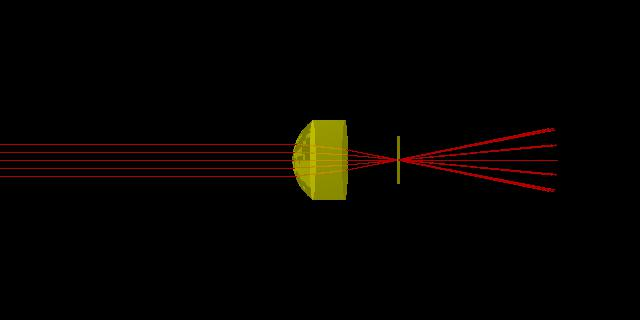

In [37]:
#Spherical lens

PB= parallel_beam_c(size=(2,2),num_rays=(5,5), wavelength=.650)
L1=library.Edmund.get("45113") #f=200 r= 25

CSph=CCD(size=(3,3))


SSph=System(complist=[(L1,(0,0,20),(0,0,0)),(CSph,(0,0,24.91676331),(0,0,0))],n=1)

SSph.ray_add(PB)
SSph.propagate()

display(Plot3D(SSph,center=(0,0,20), size=(40,20),scale=16,rot=[(0,pi/2.1,0)]))

In [3]:
## Definition of the aspheric lens

R=2.75
k=-0.6139160
A2=0
A4=5.8891900E-04
A6=-1.7660200E-05
A8=1.0102500E-05
A10=-3.9148700E-06


r2=poly2d((0,0,0,1.,0,1.))
r4=r2*r2
r6=r4*r2
r8=r4*r4
r10=r8*r2

poly=A2*r2+A4*r4+ A6*r6 +A8*r8 +A10*r10

asf2=Aspherical(Kx=k, Ky=k, Ax=1./R,Ay=1./R, shape=Circular(radius=2.5),
                                poly=poly)

R=-3.1885400
k=-12.6638600

A2=0
A4=1.2458340e-02
A6=-3.7119450e-03
A8=5.1223910e-04
A10=-3.1085780e-05
poly=A2*r2+A4*r4+ A6*r6 +A8*r8 +A10*r10

asf1=Aspherical(Kx=k, Ky=k, Ax=1./R,Ay=1./R, shape=Circular(radius=2.5),
                                poly=poly, reflectivity=.5)


AS=Component(surflist=[(asf2, (0, 0, 0), (0, 0, 0)), (asf1, (0, 0, 2.8+.35), (0,0, 0))], material=1.58913)


In [40]:
# Finding the plane of the circle of least confusion

def CircleAsph(lp):
    L=library.Edmund.get("45113")
    CAsph=CCD(size=(3,3))

    SAsph=System(complist=[(AS,(0,0,20),(0,0,0)),(CAsph,(0,0,lp),(0,0,0))],n=1)
    PB= parallel_beam_c(size=(2,2),num_rays=(5,5), wavelength=.650)

    SAsph.ray_add(PB)
    SAsph.propagate()
    X,Y,Z=CAsph.get_optical_path_data()
    return array(X).std()

In [41]:
CircleAsph(25)

0.011224380388868025

In [42]:
from scipy.optimize import fmin
fmin(CircleAsph,25)

Optimization terminated successfully.
         Current function value: 0.000543
         Iterations: 15
         Function evaluations: 30


array([ 24.95140076])

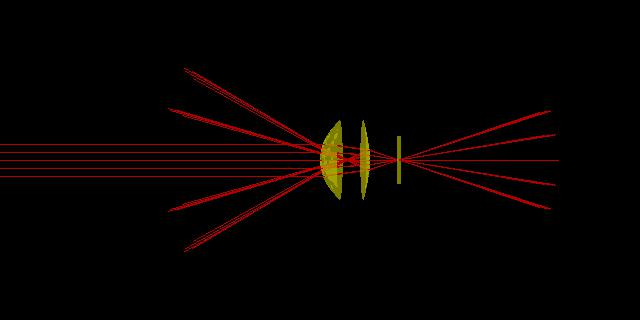

In [4]:
# Visualization of the aspheric lens

PB= parallel_beam_c(size=(2,2),num_rays=(5,5), wavelength=.650)

CAsph=CCD(size=(3,3))

SAsph=System(complist=[(AS,(0,0,20),(0,0,0)),(CAsph,(0,0,24.95140076),(0,0,0))],n=1)

SAsph.ray_add(PB)
SAsph.propagate()

Plot3D(SAsph,center=(0,0,20), size=(40,20),scale=16,rot=[(0,pi/2.1,0)])

Populating the interactive namespace from numpy and matplotlib


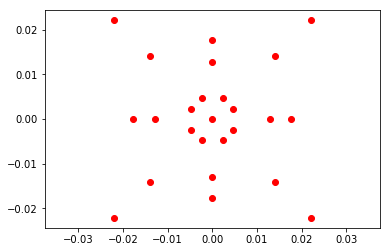

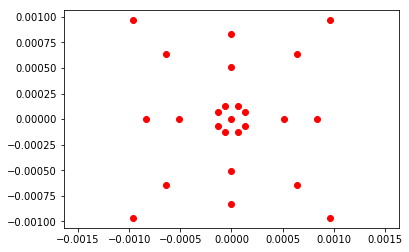

In [45]:
# The circle of least confusion is about 20 times smaller when using the aspheric lens

%pylab inline

spot_diagram_c(CSph)
figure()
spot_diagram_c(CAsph)

### 5.5 Binocular  design <a class="anchor" id="55"></a>
This example has been inspired by the book *Fischer, Tadic-Galeb, Yoder.  Optical system design. Second edition; chapter 22, p642* where the design of a binocular is studied. Although the book does not provide any specific optical component to be used in the design, it does provide guidelines on how to choose and locate the optical components.

The binocular proposed in the book is a $7 \times 50$ binocular. It is recommended to use an achromatic doublet of 200mm of focal length and 50mm of diameter as an objective and a double Porro prism of SK5 glass. It is suggested to leave at least 40mm from the exit surface of the second prism to the image plane. A symmetrical eyepiece, composed of two achromatic  doublets, is suggested. The suggested eyepiece focal length is f is 30mm.

The example is developed step by step. The binocular has been designed using *pyOpTools* predefined components and lenses from the Edmund Optics Inc catalogue.

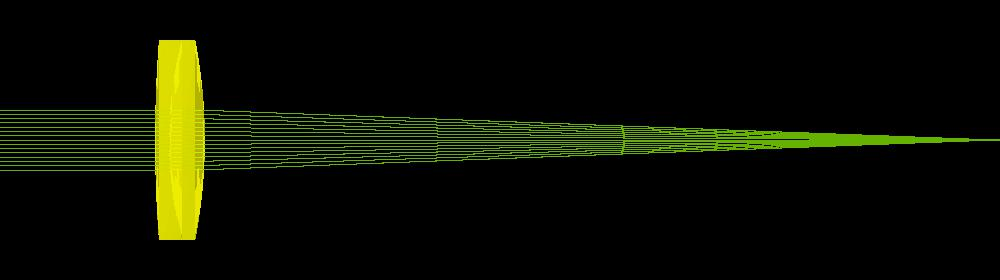

199.226095043


In [4]:
# Lenses choice: We look in the catalogue for the appropiate objective lens

L1=library.Edmund.get("45179") # f=200 r= 25

OA=Ray(pos=(0,0,-10000),dir=(0,0,1),wavelength=.55) # Optical axis

C=CCD(size=(10,10))

S=System(complist=[(L1,(0,0,100),(0,pi,0)), (C,(0,0,320.053),(0,0,0))],n=1)

PB=parallel_beam_c(origin=(0,0,50),direction=(0,0,0),size=(15,15),num_rays=(15,15),wavelength=.55)

S.ray_add(PB)

S.propagate()

display(Plot3D(S,center=(0,0,180),size=(250,70),scale=4,rot=[(0,pi/2,0)]))

f=(nearest_points(PB[7].get_final_rays()[0],PB[8].get_final_rays()[0])[0][2])-(find_ppp(S, OA)[2])
print f

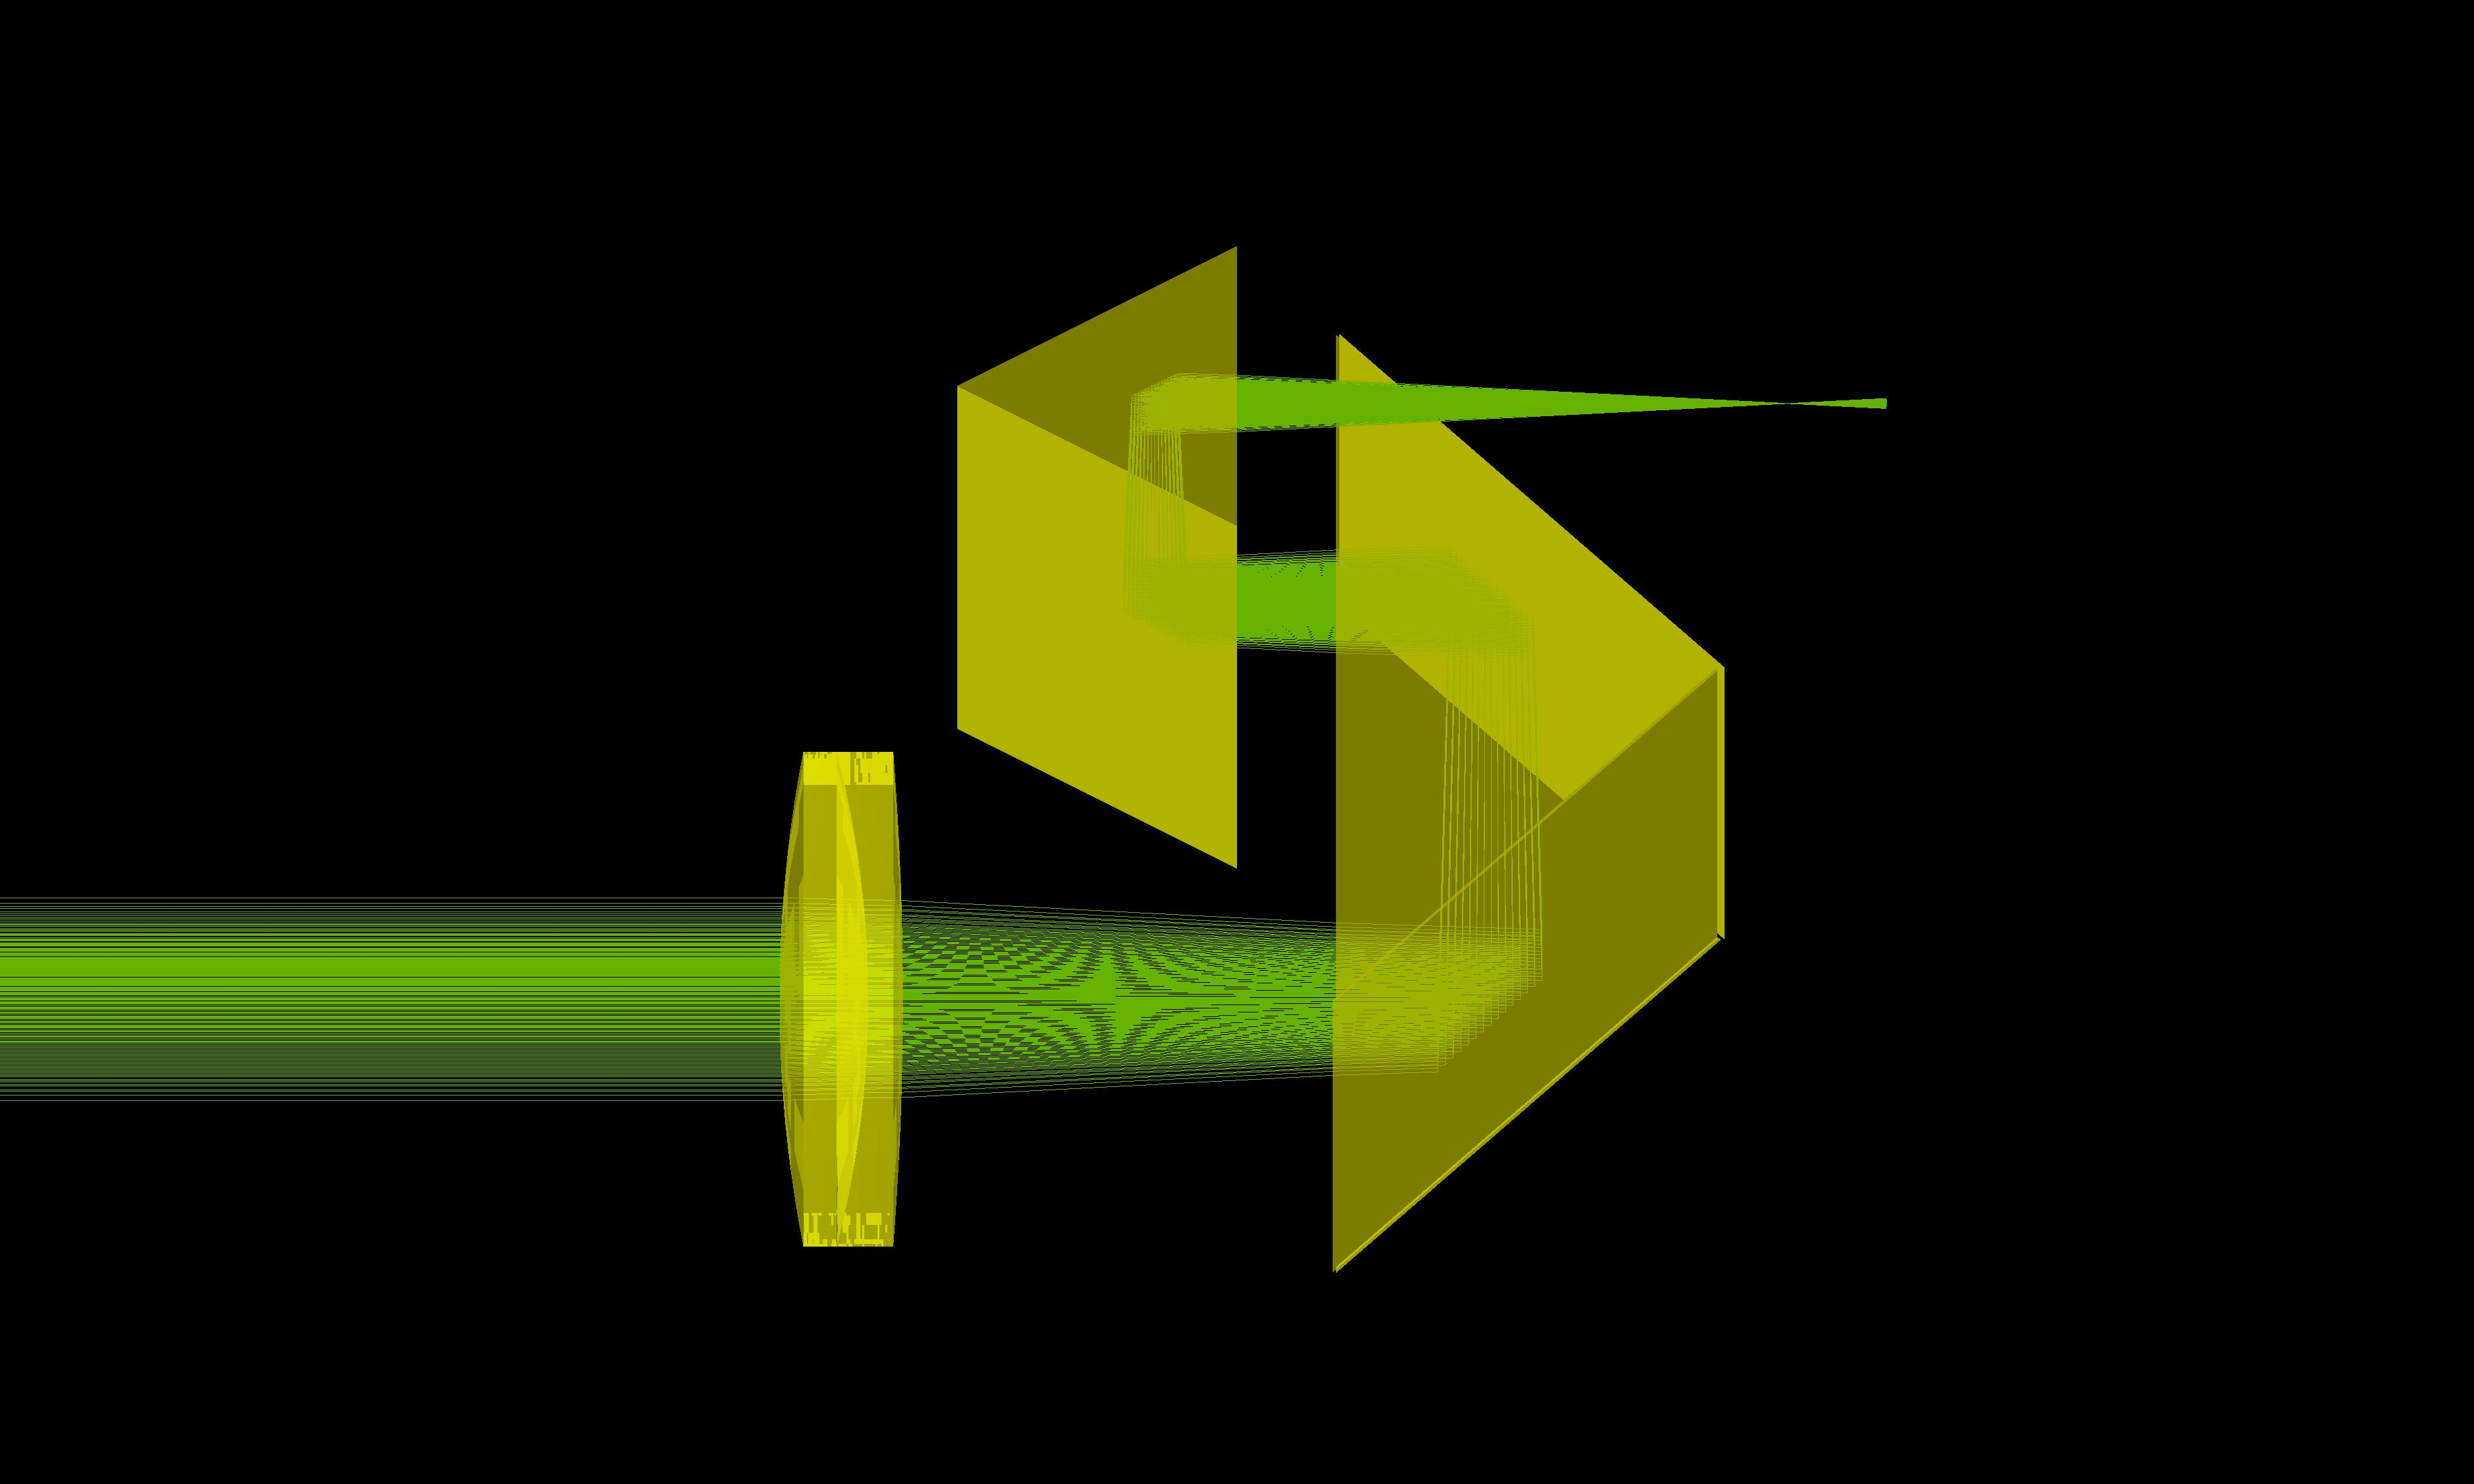

(array([ -40.        ,  -46.41421173,  195.64275613]),
 array([ -40.        ,  -46.41421173,  195.64275613]),
 1.4210854715202004e-14,
 True)

In [2]:
# Placing the objective and the Porro prism

L1=library.Edmund.get("45179") #f=200 r= 25

RP1=RightAnglePrism(width=55,height=55,material=material.schott["SK5"])
RP2=RightAnglePrism(width=40,height=40,material=material.schott["SK5"])

CC=CCD(size=(50,50))

S=System(complist=[(L1,(0,0,100),(0,0,0)), (RP1,(0,-22.5,150),(pi,-pi/4,pi/2)), (RP2,(-20,-40,140),(0,pi/4,0)),
                   (CC,(-40,-46.41421356,  195.64187845),(0,0,0))],n=1)

PB=parallel_beam_c(origin=(0,0,0),direction=(0,0,0),size=(15,15),num_rays=(15,15),wavelength=.55)

S.ray_add(PB)
S.propagate()

display(Plot3D(S,center=(0,-30,140),size=(250,150),scale=15,rot=[(0,pi/2.,0),(pi/6,0,0)]))

# Calculating the coordinates of the paraxial focal point
nearest_points(PB[110].get_final_rays()[0],PB[115].get_final_rays()[0]) 


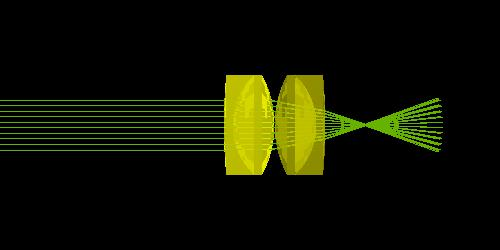

(array([  -0.30308561,    0.16838089,  112.35061491]),
 array([  -0.22400544,    0.17422645,  112.32427176]),
 0.083557197143477216,
 False)

In [5]:
# Looking for the right eyepiece configuration

L2=library.Edmund.get("45175") # f=30 ; r=10  

CC=CCD(size=(50,50))
S=System(complist=[(L2,(0,0,89.84),(0,pi,0)), (L2,(0,0,100),(0,0,0)), (CC,(0,0,1.18656541e+02),(0,0,0))],n=1)

## The distance between the two doublets is equal to the total lense thickness

PB=parallel_beam_c(origin=(0,0,0),direction=(0,0,0),size=(10,10),num_rays=(10,10),wavelength=.55)

S.ray_add(PB)
S.propagate()

display(Plot3D(S,center=(0,0,90),size=(100,50),scale=5,rot=[(0,pi/2,0)]))

#Distance between the center of the lense and the paraxial focal point
nearest_points(PB[7].get_final_rays()[0],PB[8].get_final_rays()[0]) 


Populating the interactive namespace from numpy and matplotlib


/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'unwrap', 'void', 'cross']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


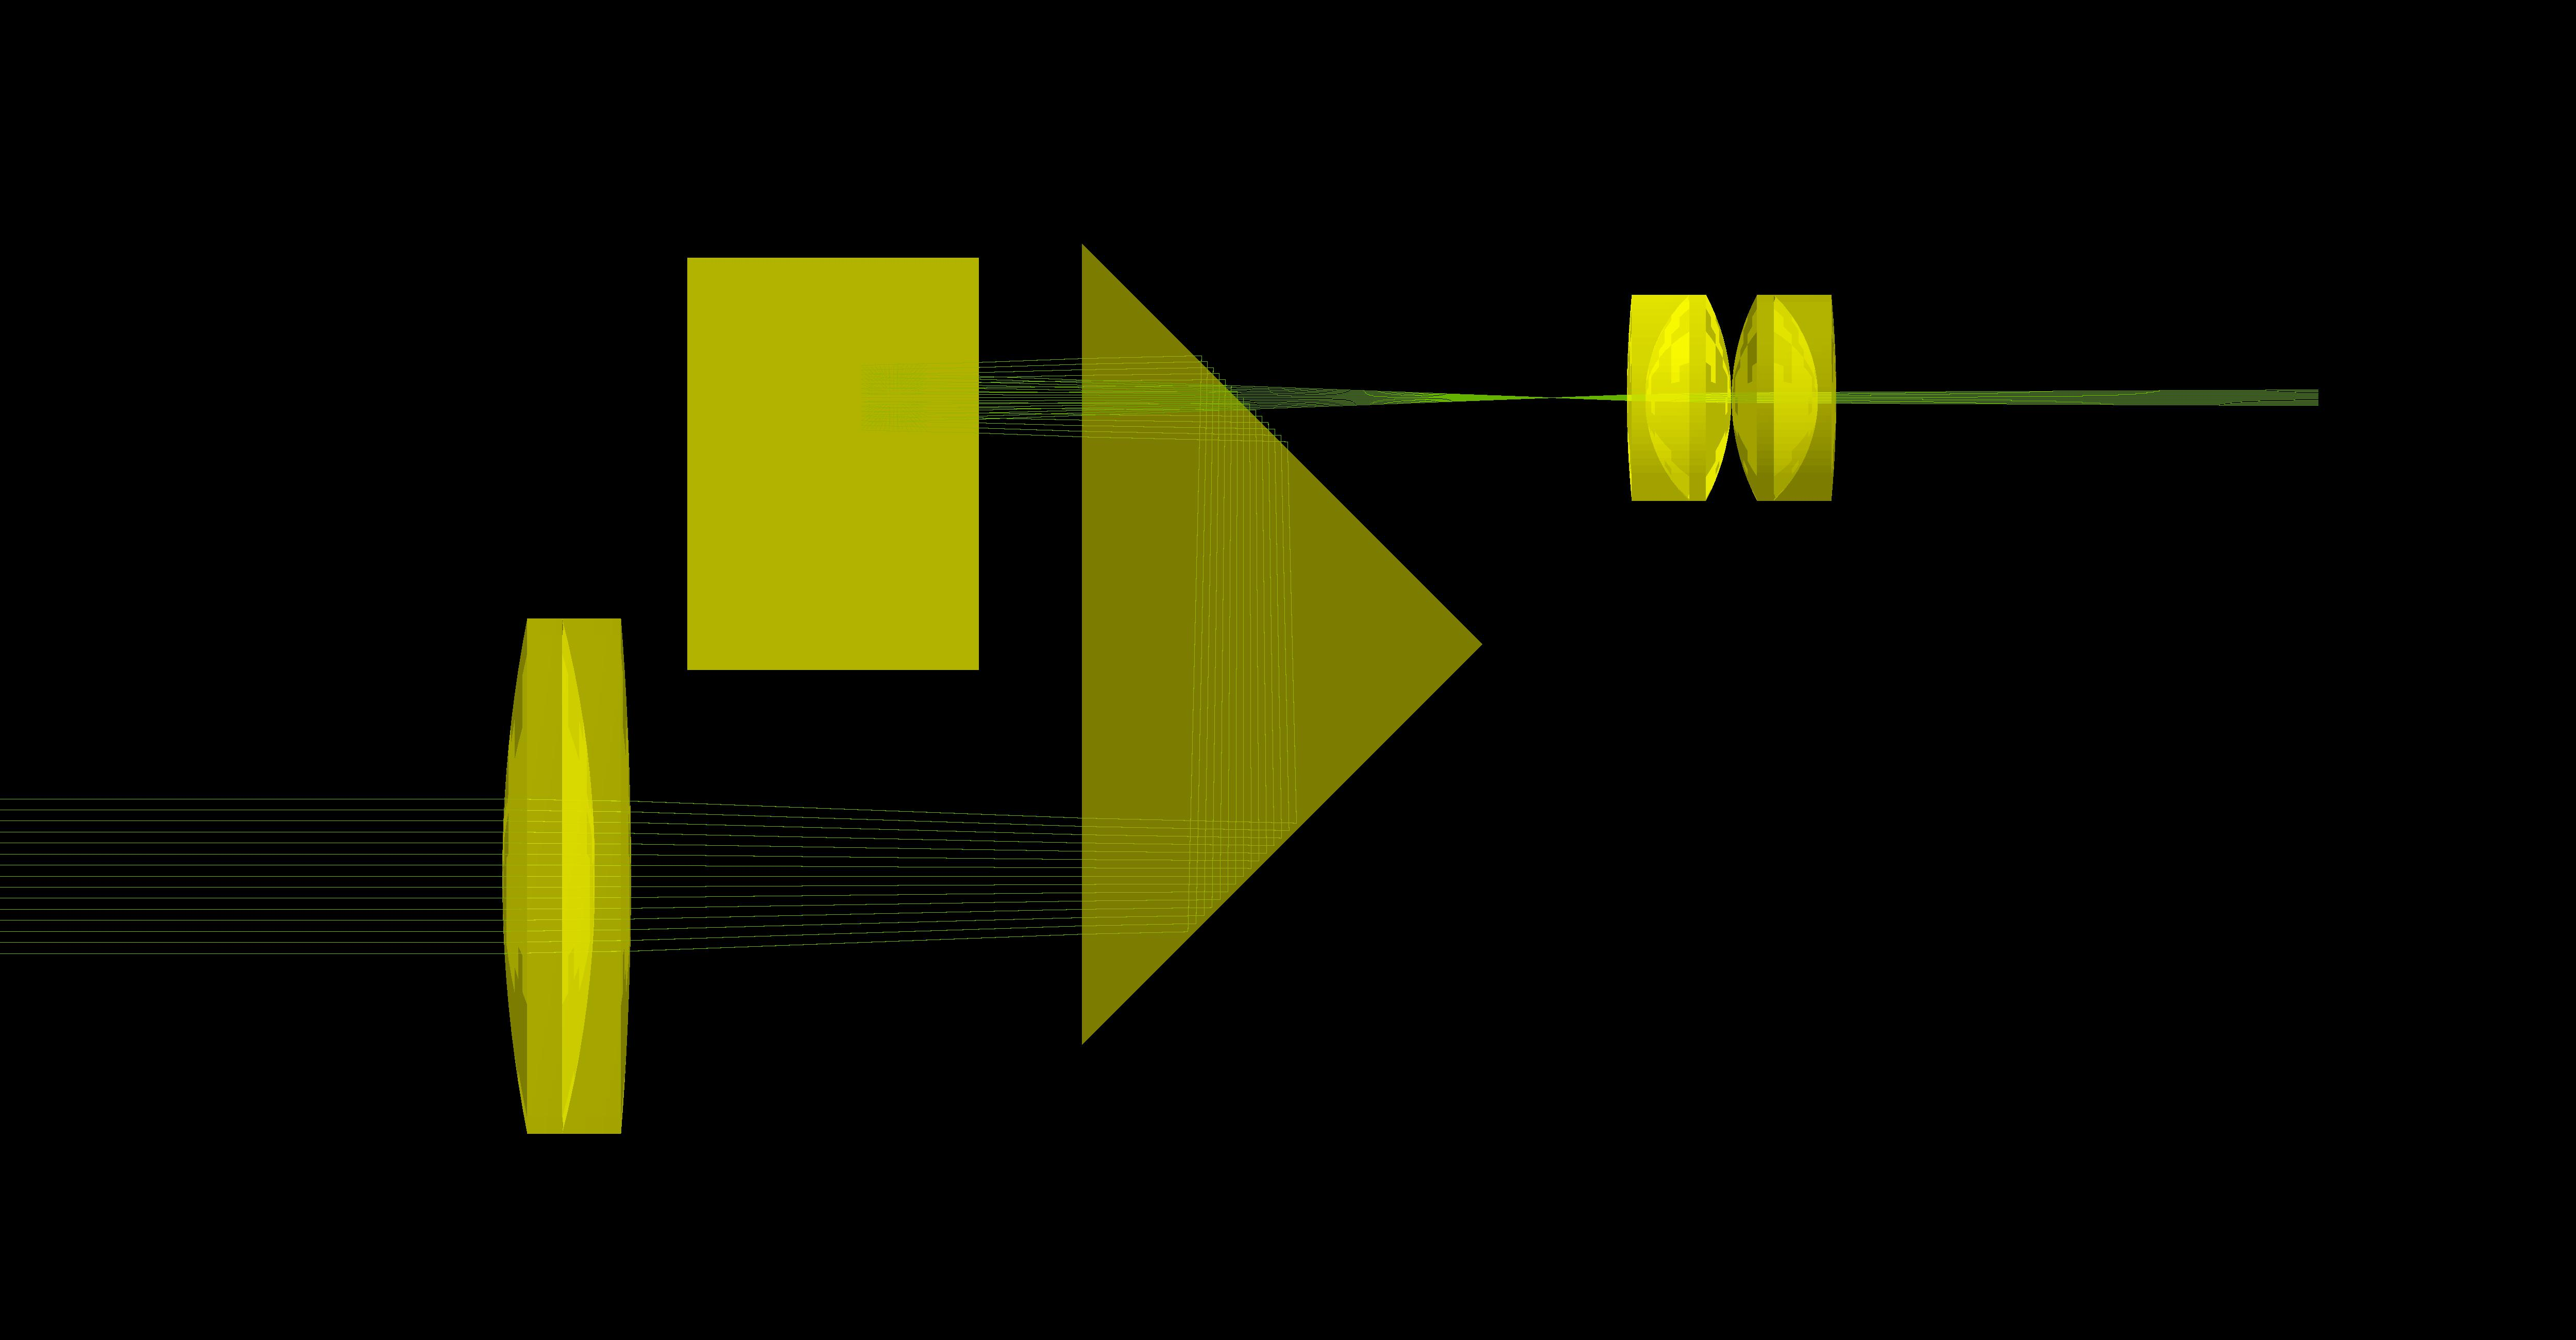

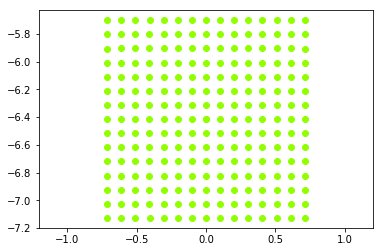

In [2]:
## Placing the eyepiece: Binocular 7x50

L1=library.Edmund.get("45179") #f=200 r= 25
L2=library.Edmund.get("45175") # f=30 ; r=10  


RP1=RightAnglePrism(width=55,height=55,material=material.schott["SK5"])
RP2=RightAnglePrism(width=40,height=40,material=material.schott["SK5"])


CC=CCD(size=(50,50))

S=System(complist=[(L1,(0,0,100),(0,0,0)), (RP1,(0,-22.5,150),(pi,-pi/4,pi/2)), (RP2,(-20,-40,140),(0,pi/4,0)), 
                   (L2,(-40,-46.41421356,195.64187847+12.32427176),(0,pi,0)), 
                   (L2,(-40,-46.41421356,195.64187847+12.32427176+10.16),(0,0,0)),
                   (CC,(-40,-40,260),(0,0,0))],n=1)

OA=Ray(pos=(0,0,100),dir=(0,0,10),intensity=100, wavelength=.55) # Optical axis
PB=parallel_beam_c(origin=(0,0,0),direction=(0,0,0),size=(15,15),num_rays=(15,15),wavelength=.55)

S.ray_add(OA)
S.ray_add(PB)
S.propagate()

%pylab inline
display(Plot3D(S,center=(0,-20,170),size=(250,130),scale=20,rot=[(0,pi/2.,0),(0,0,0)]))
figure()
spot_diagram_c(CC)


### 5.6 Correcting aberrations using a diffraction grating <a class="anchor" id="56"></a>
In this example we study a two lenses system which present aberrations and create a diffraction gratting to correct them. 

First we collect the optical path length map between the lenses of the optical system. Then we choose a focal point and propagate rays backwards from this focal point. We collect again the optical path length map inside the optical system. Then we aproximate the optical path length maps to polynomials and add them to create an interference pattern used to define a diffraction grating. This diffraction grating corrects the aberrations. Finally we create an hologram using the diffraction grating.

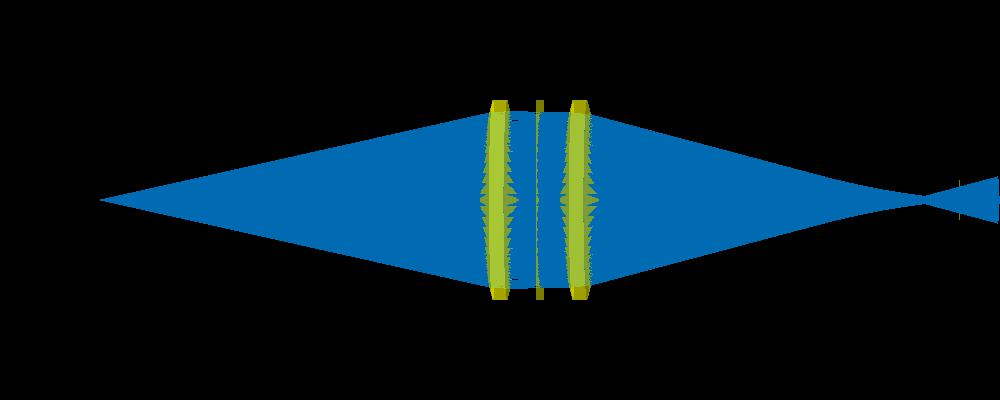

In [2]:
## Aberrated optical system:

## We place a CCD named HOLO between the two lenses 
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

HOLO=CCD(size=(50,50))

S=System(complist=[(L2,(0,0,100),(0,0,0)),(HOLO,(0,0,110),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

R=point_source_p(origin=(0.,0.,0.),direction=(0.,0.,0),span=pi/14
                   ,num_rays=(50,50),wavelength=0.470, label="blue")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2.05,0)])

In [3]:
# We aproximate the optical path length map with a polynomial

pol1,err1=HOLO.get_optical_path_map_lsq(order=15) 

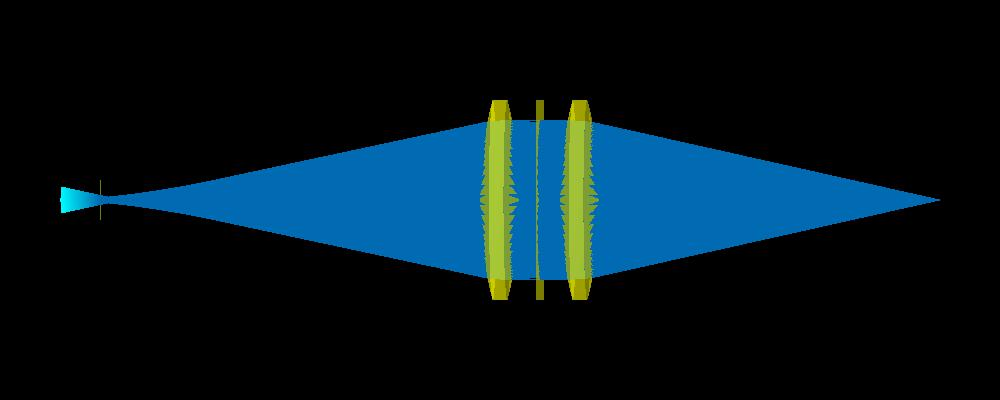

In [4]:
## Now we make the beam propagate backwards from a point fi

fi=210

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

HOLO=CCD(size=(50,50))

S=System(complist=[(L2,(0,0,100),(0,0,0)),(HOLO,(0,0,110),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,0),(0,0,0)) ],n=1)

R=point_source_p(origin=(0.,0.,fi),direction=(pi,0.,0),span=pi/14
                   ,num_rays=(50,50),wavelength=0.470, label="blue")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2.05,0)])

In [5]:
# We aproximate the optical path length map with a polynomial

pol2,err2=HOLO.get_optical_path_map_lsq(order=15) 

Populating the interactive namespace from numpy and matplotlib


/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'unwrap', 'void', 'cross']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


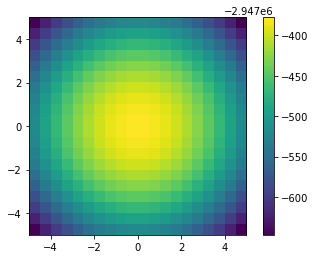

In [6]:
# We add the polynomials

%pylab inline
grid=(2*pi/0.47e-3)*(-pol1-pol2)
X,Y=meshgrid(linspace(-5,5,20),linspace(-5,5,20))

Z=grid.eval(X,Y)
imshow(Z,extent=(-5,5,-5,5));colorbar()

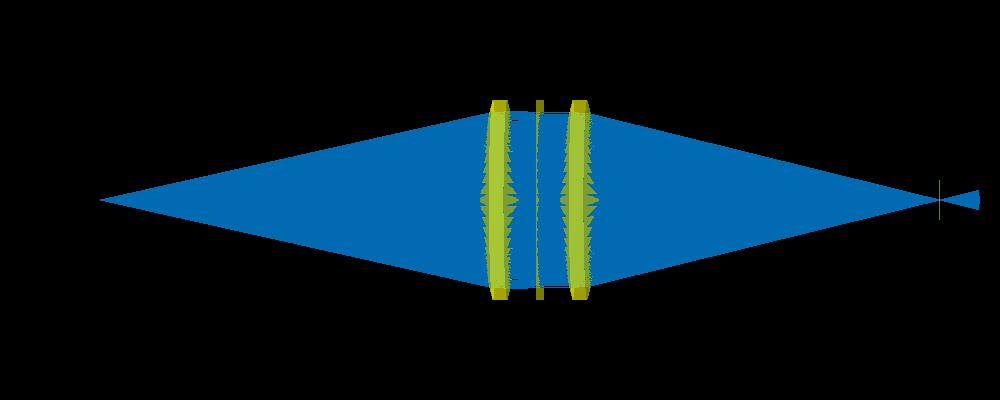

In [7]:
# Correcting aberrations: Creating and placing the diffraction grating

G=RPPMask(shape=Rectangular(size=(50,50)), phm=(2*pi/0.47e-3)*(-pol1-pol2), M=[1])
DG=Component(surflist=[(G, (0, 0, 0), (0, 0, 0))])

fi=210

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(DG,(0,0,110),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,fi),(0,0,0))],n=1)

R=point_source_p(origin=(0.,0.,0),direction=(0,0.,0),span=pi/14,num_rays=(50,50),wavelength=0.470, label="blue")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2.05,0)])


### 5.7 Creating an hologram <a class="anchor" id="57"></a>
Nowwe create an hologram from the diffraction gratting created above

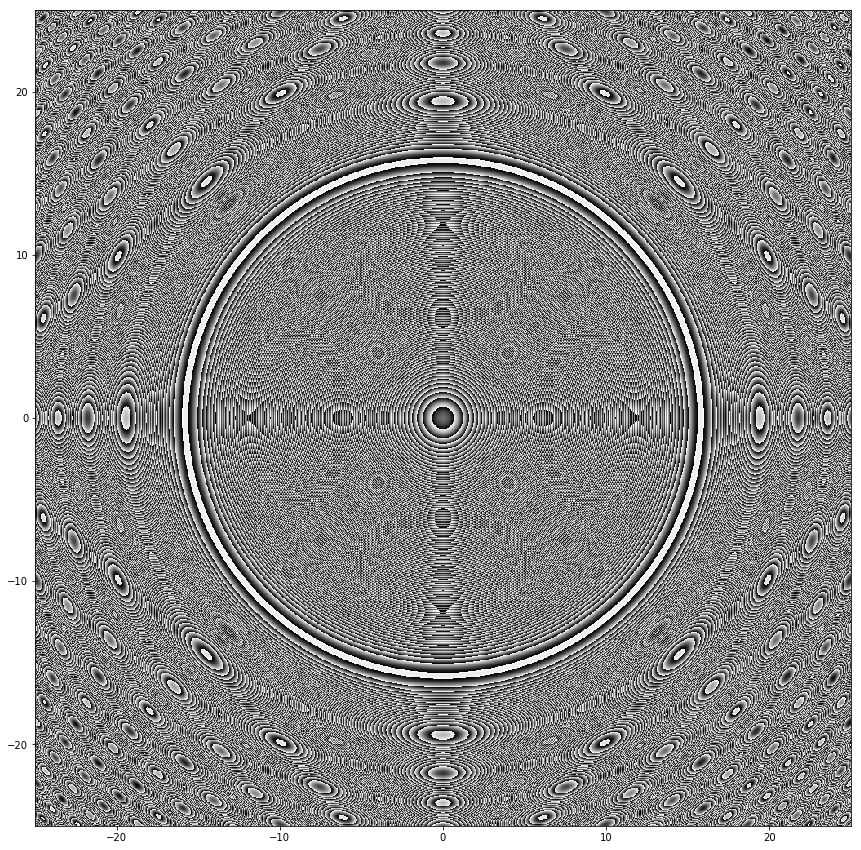

In [8]:
# Hologram

holo=(2*pi/.470e-3)*(-pol1-pol2)

X,Y=meshgrid(linspace(-25,25,1000),linspace(-25,25,1000))

figsize(15,15)
imshow(holo.meval(X,Y)%(2*pi),extent=(-25,25,-25,25),cmap="gray")